- ex)코로나 바이러스인지를 예측하는 모델이라면?
    - Precision(정밀도): TP /TP + FP( 바이러스라고 예측했는데, **실제는 바이러스 아닌것**으로 진단하는 경우)
    - Recall(재현률): TP / TP + FN (바이러스가 아닌 것으로 예측했는데 **실제로 바이러스인 것**)

- 바이러스의 경우는 재현률을 좀 더 신경 써야한다.

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

In [5]:
digits['data'] # 각 이미지를 숫자화한 데이터

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [14]:
digits['target'] # 각 이미지에 대한 정답

array([0, 1, 2, ..., 8, 9, 8])

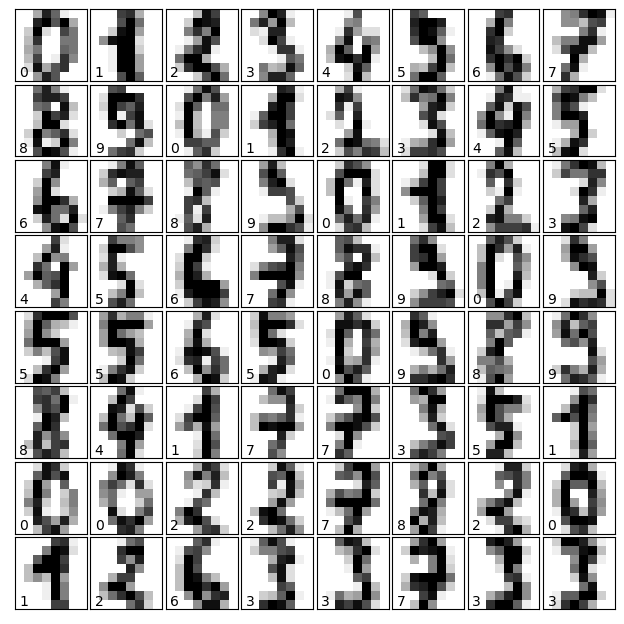

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64): # because of 64 columns of data length
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]))

### 훈련 집합을 기반으로 테스트 집합 만들기

- train_test_split() 리턴값
    - X_train: 랜덤하게 뽑은 data
    - X_test: 나머지 data
    - y_train: 랜덤하게 뽑은 X_train 데이터에 대한 **정답**
    - y_test: 나머지 X_test 데이터에 대한 **정답**

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

### 모델로 예측
- 1. 모델 생성
- 2. 학습
- 3. 예측

1. 모델 생성

In [10]:
from sklearn.naive_bayes import GaussianNB

OneOfNavieBayesianModels = GaussianNB()

2. 학습

In [11]:
OneOfNavieBayesianModels.fit(X_train, y_train)

GaussianNB()

3. 예측

In [12]:
predicted = OneOfNavieBayesianModels.predict(X_test)

4. 성능 평가

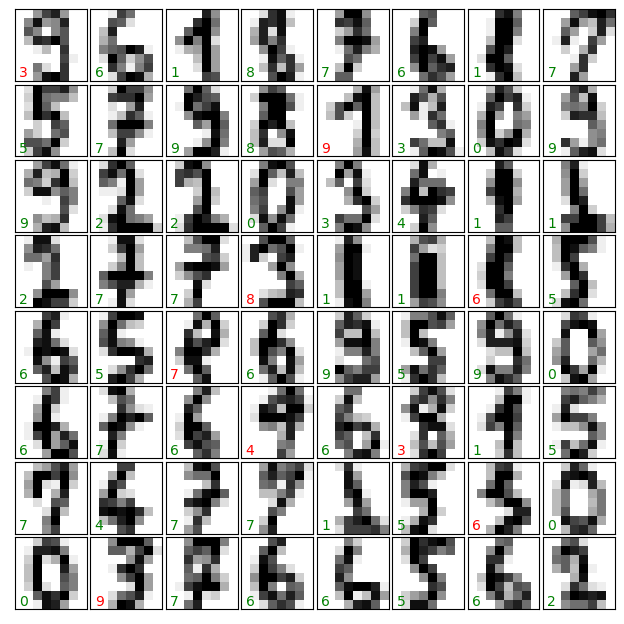

In [13]:
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary, interpolation='nearest')

    if predicted[i] == y_test[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(predicted[i]), color='red')